# Reading the data into python

In [1]:
# Supressing the warning messages
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the dataset
import pandas as pd
import numpy as np


inventory_df = pd.read_excel(open(source_data, 'rb'),
              sheet_name='Sheet1')  

inventory_df.head()

,Category,Sub Category,Brand Name,Product Rating,Product Name,Name,Weight,MRP/Unit,Qnty,Unit Qnty,Cost Price,Product ID
0,"Food Grains, Oli and Masala",Rava,24 Mantra Organic,3,TWENTY FOUR ORG IDLY RAVA 500g,TWENTY FOUR ORG IDLY RAVA,500g,55.0,2.0,1.0,83.78,202212001.0
1,"Food Grains, Oli and Masala",Flour,24 Mantra Organic,3,TWENTY FOUR RAGI FLOUR 500g,TWENTY FOUR RAGI FLOUR,500g,70.0,2.0,1.0,106.64,202212002.0
2,"Food Grains, Oli and Masala",Staples,24 Mantra Organic,3,TWENTY FOUR ORG RED POHA 500g,TWENTY FOUR ORG RED POHA,500g,75.0,2.0,1.0,119.97,202212003.0
3,Gourmet Foods,"Tomato Ketchup , Sauces and Spreads",American Garden,3,A G CHUNKY PEANUT BUTTER 510g,A G CHUNKY PEANUT BUTTER,510g,399.0,2.0,1.0,608.96,202212004.0
4,Personal Care,Ear Buds,Johnsons and Johnsons,4,A-ONE EAR BUDS JAR SMALL 15g,A-ONE EAR BUDS JAR SMALL,15g,55.0,6.0,1.0,221.52,202212005.0


In [3]:
print('Shape before deleting duplicate values:', inventory_df.shape)

# Removing duplicate rows if any
inventory_df = inventory_df.drop_duplicates()
print('Shape After deleting duplicate values:', inventory_df.shape)

# Printing sample data
inventory_df.sample(5)

Shape before deleting duplicate values: (1022, 12)
Shape After deleting duplicate values: (1022, 12)


,Category,Sub Category,Brand Name,Product Rating,Product Name,Name,Weight,MRP/Unit,Qnty,Unit Qnty,Cost Price,Product ID
154,"Food Grains, Oli and Masala",Masalas and Spiced Masalas,Catch,4,CATCH RAJMA MASALA 100g,CATCH RAJMA MASALA,100g,63.0,6.0,1.0,241.20,202212155.0
151,"Food Grains, Oli and Masala",Masalas and Spiced Masalas,Catch,3,CATCH KASURI METHI 50g,CATCH KASURI METHI,50g,46.0,6.0,1.0,176.16,202212152.0
784,Gourmet Foods,Confectionery,Pulse,3,PULSE KACHCHA AAM CANDY IC PK 250g,PULSE KACHCHA AAM CANDY IC PK,250g,150.0,2.0,1.0,81.44,202212798.0
706,Household,Air Freshner,Odonil,3,ODONIL ZIPPER JASMINE 10g,ODONIL ZIPPER JASMINE,10g,55.0,3.0,1.0,119.13,202212713.0
775,Beauty,Skin Care,Ponds,3,PONDS TAN REMOVAL SCRUB 50g,PONDS TAN REMOVAL SCRUB,50g,150.0,4.0,1.0,405.60,202212789.0


# Defining the problem statement

#### Create a predictive model which gives relevant products recommendations

Predictors: Category, Sub Category, Brand Name, Product Rating, Name

# Basic Data Exploration

In [4]:
# Looking at the sample rows in the data
inventory_df.sample(5)

,Category,Sub Category,Brand Name,Product Rating,Product Name,Name,Weight,MRP/Unit,Qnty,Unit Qnty,Cost Price,Product ID
807,Beverages,Fruit Juices,Real,1,REAL PINEAPPLE 1lR,REAL PINEAPPLE,1lR,105.0,3.0,1.0,214.89,202212822.0
1017,"Food Grains, Oli and Masala",Cereals and Millets,Yogabar,5,YOGABAR MUESLI ALMND QUINOA 400g,YOGABAR MUESLI ALMND QUINOA,400g,325.0,1.0,1.0,179.03,202213046.0
105,Snacks & Namkeen,Branded Snacks,Brijnandan,2,BRIJNANDAN RICE RING 100g,BRIJNANDAN RICE RING,100g,45.0,2.0,1.0,40.18,202212106.0
974,Gourmet Foods,Cookies and Biscuits,Unibic,2,UNIBIC CHOCONUT COOKIES 75g,UNIBIC CHOCONUT COOKIES,75g,25.0,6.0,1.0,115.56,202213001.0
632,"Food Grains, Oli and Masala",Masalas and Spiced Masalas,Mdh,3,MDH SAMBAR MASALA 100 gm,MDH SAMBAR MASALA,100 gm,62.0,10.0,1.0,442.80,202212637.0


In [5]:
# Observing the summarized information of data
# Data types, Missing values based on number of non-null values Vs total rows etc.
# Remove those variables from data which have too many missing values (Missing Values > 30%)
# Remove Qualitative variables which cannot be used in Machine Learning
inventory_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1022 entries, 0 to 1021
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        1022 non-null   object 
 1   Sub Category    1022 non-null   object 
 2   Brand Name      1022 non-null   object 
 3   Product Rating  1022 non-null   int64  
 4    Product Name   1022 non-null   object 
 5   Name            1022 non-null   object 
 6   Weight          1022 non-null   object 
 7   MRP/Unit        1021 non-null   float64
 8   Qnty            1021 non-null   float64
 9   Unit Qnty       1020 non-null   float64
 10  Cost Price      1021 non-null   float64
 11  Product ID      1021 non-null   float64
dtypes: float64(5), int64(1), object(6)
memory usage: 103.8+ KB


In [6]:
# Looking at the descriptive statistics of the data
inventory_df.describe(include='all')

,Category,Sub Category,Brand Name,Product Rating,Product Name,Name,Weight,MRP/Unit,Qnty,Unit Qnty,Cost Price,Product ID
count,1022,1022,1022,1022.000000,1022,1022,1022,1021.000000,1021.000000,1020.000000,1021.000000,1.021000e+03
unique,18,70,253,NaN,984,906,391,NaN,NaN,NaN,NaN,NaN
top,Beauty,Skin Care,Colgate,NaN,PARLE H&S CHOCO 412.5g,MAGGI MSL NOODLES,100g,NaN,NaN,NaN,NaN,NaN
freq,216,117,49,NaN,2,7,40,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,3.195695,NaN,NaN,NaN,109.081293,5.281097,2.615686,292.178296,2.022125e+08
std,NaN,NaN,NaN,1.233257,NaN,NaN,NaN,108.344124,7.932703,9.959553,262.688841,3.026632e+02
min,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,0.000000,1.000000,1.000000,15.680000,2.022120e+08
25%,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,37.000000,2.000000,1.000000,147.920000,2.022123e+08
50%,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,75.000000,3.000000,1.000000,222.620000,2.022125e+08
75%,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,150.000000,6.000000,1.000000,340.500000,2.022128e+08


In [7]:
# Finding unique values for each column
# TO understand which column is categorical and which one is Continuous
# Typically if the numer of unique values are < 20 then the variable is likely to be a category otherwise continuous
inventory_df.nunique()

Category            18
Sub Category        70
Brand Name         253
Product Rating       5
 Product Name      984
Name               906
Weight             391
MRP/Unit           191
Qnty                30
Unit Qnty           21
Cost Price         818
Product ID        1021
dtype: int64

# Basic Data Exploration Results

Based on the basic exploration above, we can create a simple report of the data, noting down the observations regaring each column. Hence, creating a initial roadmap for further analysis.

The selected columns in this step are not final, further study will be done and then a final list will be created.

- Category     : Selected. Categorical.
- Sub Category : Selected. Categorical.
- Brand Name   : Selected. Categorical.
- Product Name: Selected. Categorical.
- Name         : Selected. Categorical.
- Weight       : Selected. Continuous.
- MRP/Unit     : Selected. Continuous.
- Qnty         : Selected. Continuous.
- Unit Qnty    : Selected. Continuous.
- Cost Price   : Selected. Continuous.
- Product ID   : Selected. Continuous.
- Product rating : Selected. Continuous.

# Visual Exploratory Data Analysis

Categorical variables: Bar plot

Continuous variables: Histogram

## Visualize distribution of all the Categorical Predictor variables in the data using bar plots
We can spot a categorical variable in the data by looking at the unique values in them. Typically a categorical variable contains less than 20 Unique values AND there is repetition of values, which means the data can be grouped by those unique values.

In [8]:
# Plotting multiple bar charts at once for categorical variables
# Since there is no default function which can plot bar charts for multiple columns at once
# we are defining our own function for the same

def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline
    
    import matplotlib.pyplot as plt
    
    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(50,5))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

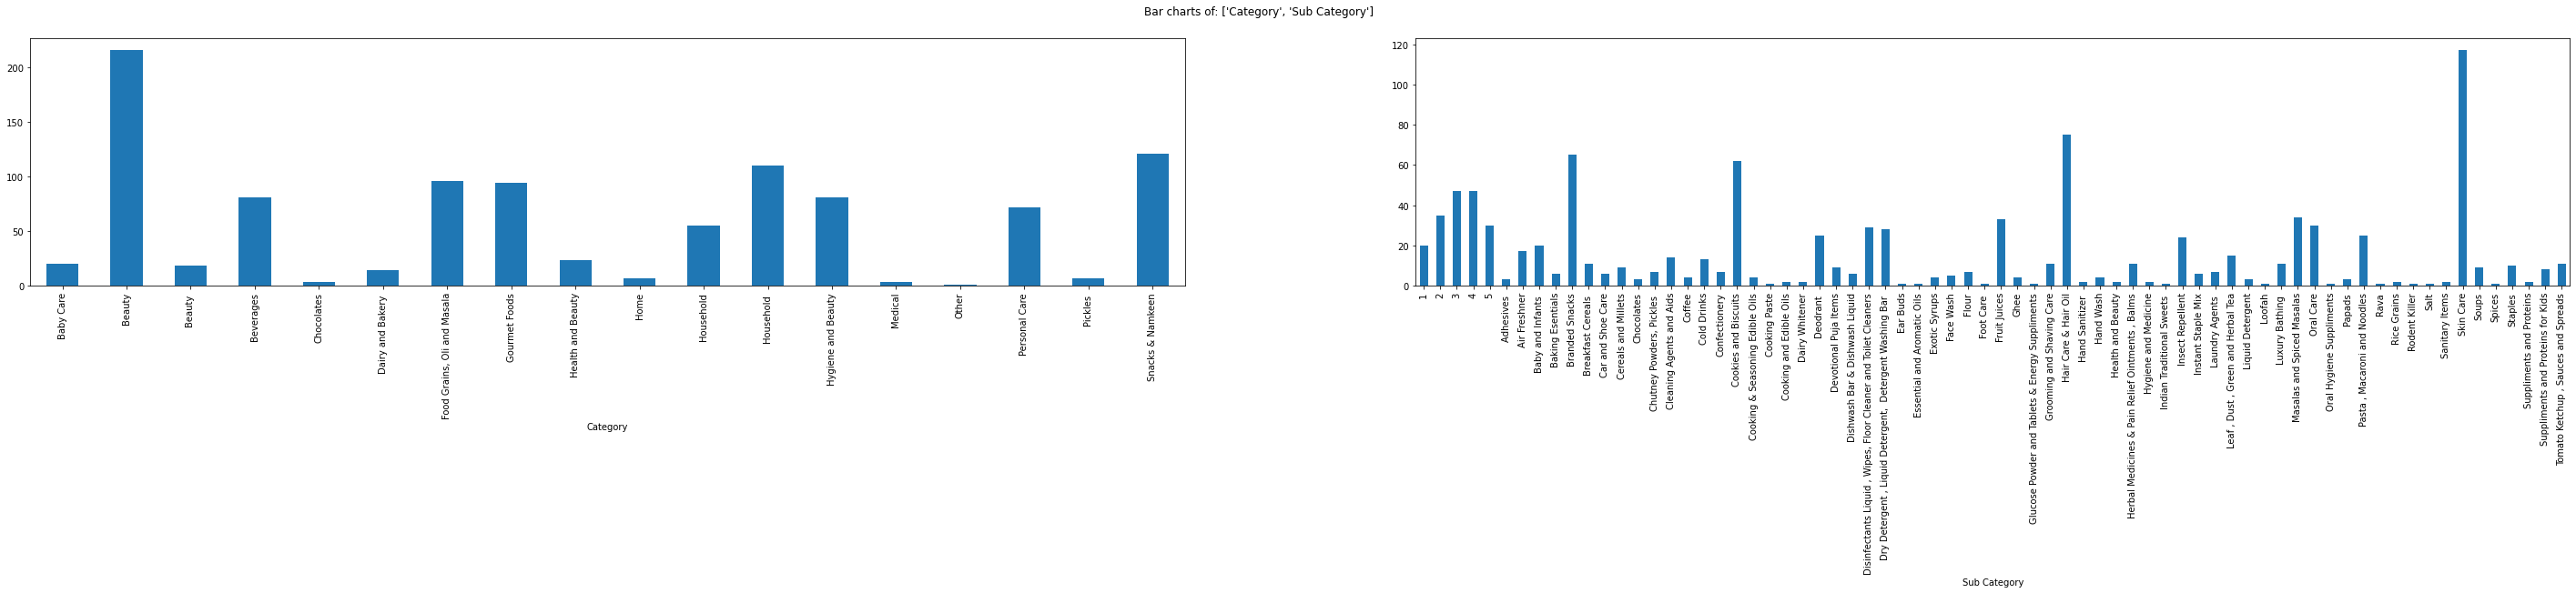

In [9]:
#####################################################################
# Calling the function for 5 columns
PlotBarCharts(inpData=inventory_df, 
              colsToPlot=['Category', 'Sub Category'])

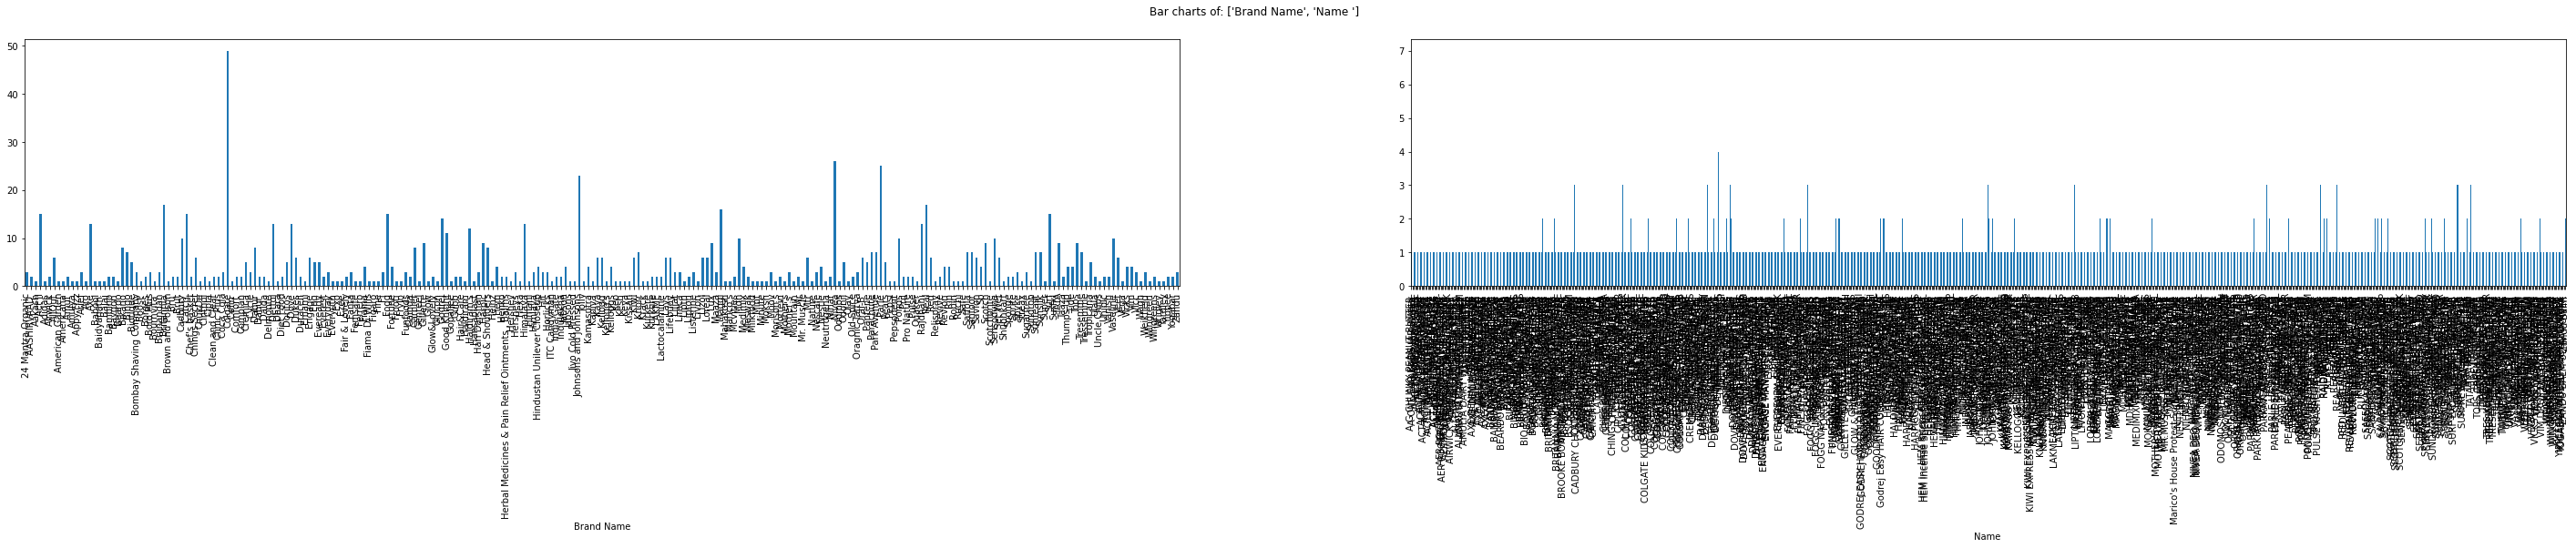

In [10]:
#####################################################################
# Calling the function for 5 columns
PlotBarCharts(inpData=inventory_df, 
              colsToPlot=['Brand Name', 'Name '])

# Bar Charts Interpretation
These bar charts represent the frequencies of each category in the Y-axis and the category names in the X-axis.

In this data, all the categorical columns except "Brand Name", "Name" and "Product Name" have satisfactory distribution for machine learning.

# Visualize distribution of all the Continuous Predictor variables in the data using histograms

array([[<AxesSubplot:title={'center':'MRP/Unit'}>,
        <AxesSubplot:title={'center':'Qnty'}>],
       [<AxesSubplot:title={'center':'Product Rating'}>, <AxesSubplot:>]],
      dtype=object)

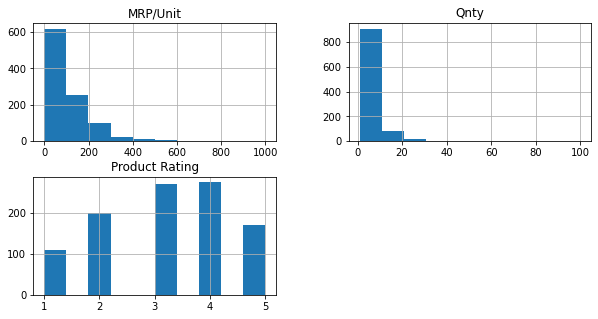

In [11]:
# Plotting histograms of multiple columns together

inventory_df.hist(['MRP/Unit', 'Qnty', 'Product Rating'], figsize=(10, 5))

array([[<AxesSubplot:title={'center':'Unit Qnty'}>,
        <AxesSubplot:title={'center':'Cost Price'}>],
       [<AxesSubplot:title={'center':'Product ID'}>, <AxesSubplot:>]],
      dtype=object)

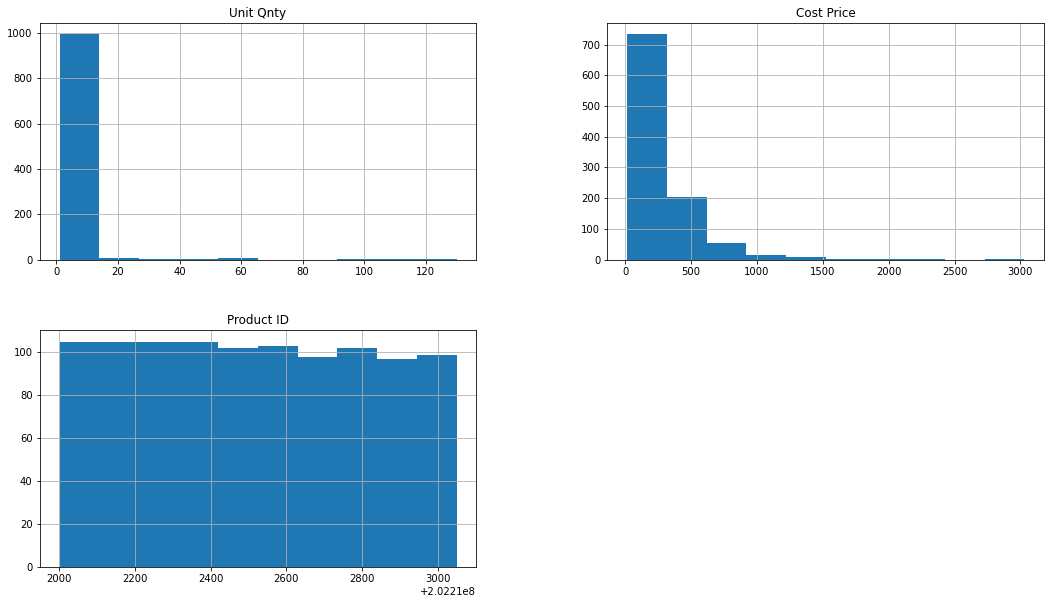

In [12]:
# Plotting histograms of multiple columns together

inventory_df.hist(['Unit Qnty', 'Cost Price', 'Product ID'], figsize=(18,10))

# Histogram Interpretation
Histograms shows us the data distribution for a single continuous variable.

The ideal outcome for histogram is a bell curve or slightly skewed bell curve. If there is too much skewness, then outlier treatment should be done and the column should be re-examined, if that also does not solve the problem then only reject the column.

Selected Continuous Variables:

- MRP/Unit   : Selected. Slightly skewed distribution, acceptable.
- Qnty       : Selected. Slightly skewed distribution, acceptable.
- Unit Qnty  : Selected. Skewed distribution, not acceptable.
- Cost Price : Selected. Slightly skewed distribution, acceptable.


# Outlier treatment
Outliers are extreme values in the data which are far away from most of the values. You can see them as the tails in the histogram.

Outlier must be treated one column at a time. As the treatment will be slightly different for each column.

Why I should treat the outliers?

Outliers bias the training of machine learning models. As the algorithm tries to fit the extreme value, it goes away from majority of the data.

There are below two options to treat outliers in the data.

- Option-1: Delete the outlier Records. Only if there are just few rows lost.
- Option-2: Impute the outlier values with a logical business value

In this data all the continuous variables have slightly skewed distribution, which is acceptable, hence no outlier treatment is required.

# Missing values treatment
Missing values are treated for each column separately.

If a column has more than 30% data missing, then missing value treatment cannot be done. That column must be rejected because too much information is missing.

There are below options for treating missing values in data.

- Delete the missing value rows if there are only few records
- Impute the missing values with MEDIAN value for continuous variables
- Impute the missing values with MODE value for categorical variables
- Interpolate the values based on nearby values
- Interpolate the values based on business logic

In [13]:
# Finding how many missing values are there for each column
inventory_df.isnull().sum()

Category          0
Sub Category      0
Brand Name        0
Product Rating    0
 Product Name     0
Name              0
Weight            0
MRP/Unit          1
Qnty              1
Unit Qnty         2
Cost Price        1
Product ID        1
dtype: int64

In [14]:
error_records_df = inventory_df[inventory_df.isnull().any(axis=1)]
error_records_df.to_csv(unprocessed_data, index=False)
error_records_df.head()

,Category,Sub Category,Brand Name,Product Rating,Product Name,Name,Weight,MRP/Unit,Qnty,Unit Qnty,Cost Price,Product ID
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False


In [15]:
inventory_df.replace('', np.nan, inplace=True)

In [16]:
inventory_df.dropna(inplace=True)

# Finding how many missing values are there for each column
inventory_df.isnull().sum()

Category          0
Sub Category      0
Brand Name        0
Product Rating    0
 Product Name     0
Name              0
Weight            0
MRP/Unit          0
Qnty              0
Unit Qnty         0
Cost Price        0
Product ID        0
dtype: int64

All the missing values are removed now.

# Data Cleansing

In [17]:
# Removing the leading and trailing spaces of columns
inventory_df.columns = inventory_df.columns.str.strip()

In [18]:
inventory_df.columns

Index(['Category', 'Sub Category', 'Brand Name', 'Product Rating',
       'Product Name', 'Name', 'Weight', 'MRP/Unit', 'Qnty', 'Unit Qnty',
       'Cost Price', 'Product ID'],
      dtype='object')

# Find Correalation between attributes

In [19]:
# To find the correlation among
# the columns using pearson method
inventory_df.corr(method ='pearson')

,Product Rating,MRP/Unit,Qnty,Unit Qnty,Cost Price,Product ID
Product Rating,1.000000,0.026425,-0.041177,0.012760,-0.021448,-0.015786
MRP/Unit,0.026425,1.000000,-0.228106,-0.079974,0.531658,-0.045739
Qnty,-0.041177,-0.228106,1.000000,-0.078142,0.234813,0.022680
Unit Qnty,0.012760,-0.079974,-0.078142,1.000000,-0.046926,-0.019392
Cost Price,-0.021448,0.531658,0.234813,-0.046926,1.000000,-0.047321
Product ID,-0.015786,-0.045739,0.022680,-0.019392,-0.047321,1.000000


# Save the file into local machine

In [20]:
inventory_df.to_csv(preprocessed_data, index=False)